## 2.RK4



In [4]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
# assume F(t) = 0

k = 50
gamma = 0.5
m = 1
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.
f_over_m = lambda t: 0
fxy_x = lambda t, x, v: v
fxy_v = lambda t, x, v: f_over_m(t) - 2 * gamma * v - k * x
ti = 0.0
tf = 5.0
n = 375
dt = (tf -ti)/(n-1)
x_Ts = np.linspace(ti, tf)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
x_4 = 0.0
v_4 = 0.2
t[0] = ti
x[0] = x_4
v[0] = v_4
omega_n = sqrt(k/m)
zeta_ud = gamma/(2*m*omega_n)
omega_d = omega_n * sqrt(1-zeta_ud**2)
A = x_4
B = v_4
DI = A
DII = (B+A*zeta_ud*omega_n)/omega_d

def rk4_x(ti,xi,vi,dt):
    K1 = fxy_x(ti,xi,vi)
    K2 = fxy_x(ti + a2 * dt, xi + b21 * K1 * dt, vi)
    K3 = fxy_x(ti + a3 * dt, xi + b31 * K1 * dt + b32 * K2 * dt, vi)
    K4 = fxy_x(ti + a4 * dt, xi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt, vi)
    vip1 = xi + (c1 * K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return xip1

def rk4_v(ti,xi,vi,dt):
    K1 = fxy_v(ti,xi,vi)
    K2 = fxy_v(ti + a2 * dt, xi, vi + b21 * K1 * dt)
    K3 = fxy_v(ti + a3 * dt, xi, vi + b31 * K1 * dt + b32 * K2 * dt)
    K4 = fxy_v(ti + a4 * dt, xi, vi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt)
    vip1 = vi + (c1 * K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return vip1

def xud_of_t(DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (DI * cos(omega_d *t) + DII * sin(omega_d * t))

def vud_if_t(DI, DII, zeta, omega_n, t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))

for i in range(1,n):
    t[i] = ti + i * dt
    x[i] = rk4_x(t[i-1], x[i-1], v[i-1], dt)
    v[i] = rk4_v(t[i-1], x[i-1], v[i-1], dt)
x_ud = [xud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]
v_ud = [vud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]


plt.plot(x_TS, x_ud, label = "Exact Solution", color = "b", linewidth = "2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for function x(t)")
plt.text(1 + tf, -0.02, f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b23:.2f}")
plt.xlabel("t(s)")
plt.ylabel("x(m)")
plt.legend()
plt.show()
plt.plot(x_TS, v_ud, label = "Exact Solution", color = "b", linewidth = "2.0")
plt.plot(t, v, label = "Runge_Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for function v(t)")
plt.text(1 + tf, -0.15, f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b23:.2f}")
plt.xlabel("t(s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()

NameError: name 'xip1' is not defined

## 3 RK4 Overdamping example

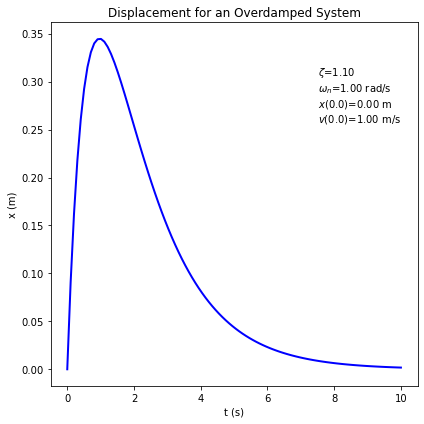

In [6]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

def x_of_t(lI,lII,t):
    return 1/(lI-lII)*exp(lI*t)+1/(lII-lI)*exp(lII*t)
def v_of_t(lI,lII,t):
    return lI/(lI-lII)*exp(lI*t)+lII/(lII-lI)*exp(lII*t)

zeta = 1.1
omega_n = 1.
lambda_I = -omega_n * (zeta - sqrt(zeta**2 - 1))
lambda_II = -omega_n * (zeta + sqrt(zeta**2 - 1))

ti = 0.
tf = 10.
t = np.linspace(ti,tf,100)
x = [x_of_t(lambda_I, lambda_II,tval) for tval in t]

fig = plt.figure(figsize=(6,6))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for an Overdamped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
x0 = x_of_t(lambda_I,lambda_II,t[0])
v0 = v_of_t(lambda_I,lambda_II,t[0])
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

## 3.2 Critically damped example

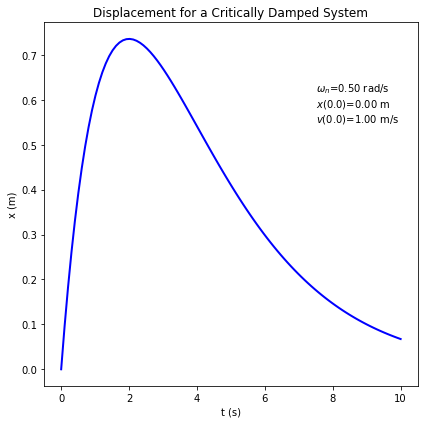

In [7]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

def x_of_t(omega_n, t):
    return t*exp(-omega_n*t)
def v_of_t(omega_n, t):
    return exp(-omega_n*t)*(1-omega_n*t)

omega_n = 0.5

ti = 0.
tf = 10.
t = np.linspace(ti,tf,100)
x = [x_of_t(omega_n,tval) for tval in t]

fig = plt.figure(figsize=(6,6))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for a Critically Damped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
x0 = x_of_t(omega_n,t[0])
v0 = v_of_t(omega_n,t[0])
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()


## RK4 underdamping example

In [8]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

def x_of_t(zeta,omega_n,omega_d,t):
    return exp(-zeta*omega_n*t)*(cos(omega_d*t)+zeta*omega_n/omega_d*sin(omega_d*t))
def v_of_t(zeta,omega_n,omega_d,t):
    return exp(-zeta*omega_n*t)*(-omega_d*sin(omega_d*t)-zeta*omega_n*cos(omega_d*t)+zeta*omega_n/omega_d*(omega_d*cos(omega_d*t)-zeta*omega_n*sin(omega_d*t)))       

zeta = 0.1
omega_n = 5
omega_d = omega_n*sqrt(1-zeta**2)

ti = 0.
tf = 10.
t = np.linspace(ti,tf,500)
x = [x_of_t(zeta,omega_n,omega_d,tval) for tval in t]

fig = plt.figure(figsize=(7,7))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for an Underdamped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
omega_d_str = "\omega_d"
x0 = x_of_t(zeta,omega_n,omega_d,t[0])
v0 = v_of_t(zeta,omega_n,omega_d,t[0])
txt_loc_x = 0.70*tf
txt_loc_y = 0.70*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n${omega_d_str}$={omega_d:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()$x_{\small critdamp} = C_I e^{-\omega_n t} + C_{II} t e^{-\omega_n t}$

SyntaxError: invalid syntax (1816927103.py, line 34)